In [11]:
import json
import numpy as np
import sys
import pickle
import matplotlib.pyplot as plt

NETWORK_FILE_PATH = './cs109_final_backend/cs109_final_backend/network_files/pickled_network.pickle'

with open(NETWORK_FILE_PATH, 'rb') as f: 
    NETWORK = pickle.load(f)
    

In [12]:
def n_top_songs(playlist_songs, network, num_samples=4000, num_top_songs=100): 
    key_errors = 0
    all_samples = np.array([])
    for song_uri in playlist_songs: 
        try : 
            sample = np.random.choice(network[song_uri]['songs'], num_samples, p=network[song_uri]['counts'])
            all_samples = np.append(all_samples, sample)
        except KeyError: 
            key_errors += 1
    
    unique, counts = np.unique(all_samples, return_counts=True)
    
    counts = counts.astype(float) / np.sum(counts)
    # print (counts)
    counted_samples = zip(unique, counts)
    counted_samples = [sample for sample in counted_samples if sample[0] not in playlist_songs]
    counted_samples = sorted(counted_samples, key=lambda x: x[1], reverse=True)
    
    num_to_return = min(num_top_songs, len(counted_samples))

#     print ("There were {} key errors".format(key_errors))
    return counted_samples[:num_to_return]

In [13]:
with open('./mpd.v1/data/mpd.slice.{}-{}.json'.format(5000, 5999)) as f : 
        data = json.load(f)

In [14]:
# tracks = [t['track_uri'] for t in data['playlists'][8]['tracks']]
# train_tracks = tracks[:5]  
# test_tracks = tracks[5:]

In [15]:
def evaluate_accuracy(train, test, network, num_predictions): 
    print ("starting with {} songs, and trying to find {} songs".format(len(train), len(test)))
    preds = n_top_songs(train, network, num_top_songs = num_predictions)
    preds = [p[0] for p in preds]
    correct_ratio = len([x for x in preds if x in test])/(1. * len(test))
    print(correct_ratio)
    return correct_ratio

In [16]:
# evaluate_accuracy(train_tracks, test_tracks, NETWORK, 500)

In [17]:
def build_train_test_set(start, blocks = 1, n_train=10) : 
    """ evaluates on n 1000 playlist blocks beginning with file start = start
    """
    f_start = start * 1000
    f_end = start * 1000 + 999
    train_songs = []
    test_songs = []
    for i in range(blocks): 
        with open('./mpd.v1/data/mpd.slice.{}-{}.json'.format(f_start, f_end)) as f :
            data = json.load(f)
            
            for playlist in data['playlists'] : 
                tracks = [t['track_uri'] for t in playlist['tracks']]
                if len(tracks) > 10 * n_train: 
                    train = tracks[:n_train]
                    test = tracks[n_train:]

                    train_songs.append(train)
                    test_songs.append(test)
            
            
    return train_songs, test_songs            
            

In [18]:
train, test = build_train_test_set(100, blocks=10,)

In [19]:
train[0]

['spotify:track:2ND2QeqhI5QTPuf9CrACSd',
 'spotify:track:7KXjTSCq5nL1LoYtL7XAwS',
 'spotify:track:439TlnnznSiBbQbgXiBqAd',
 'spotify:track:1ZX8sOGnVyE5FZBh1oKzZa',
 'spotify:track:3oiHKYb11NDsLlHJZXYa53',
 'spotify:track:6uhOq4yyFKGXySbH1yv5j6',
 'spotify:track:27PmKcvsjXp7G1IQgLUkYY',
 'spotify:track:27mF2eUbhExYWiOT0y9cuc',
 'spotify:track:5tZmLjU4vhPlJb12IweZuB',
 'spotify:track:1m5HcIPX2T3wSoiHWhgwpA']

In [20]:
len(train), len(test)

(2320, 2320)

In [ ]:
to_plot = []
train_size = []
for trn, tst in zip(train, test): 
    to_plot.append(evaluate_accuracy(trn, tst, NETWORK, 500))
    train_size.append(1. * len(trn)/ len(tst))

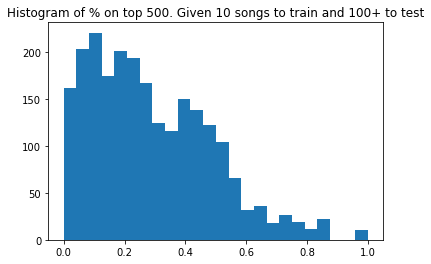

In [22]:
bins = np.linspace(0,1,25)
plt.hist(to_plot, bins=bins)
plt.title('Histogram of % on top 500. Given 10 songs to train and 100+ to test')
plt.show()

In [23]:
print(np.mean(to_plot))
print(np.median(to_plot))
print(np.var(to_plot))

0.2866185136416287
0.25
0.039539681998899255


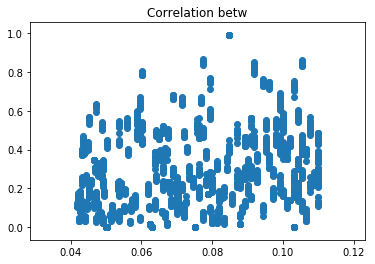

In [24]:
plt.scatter(train_size, to_plot)
plt.title('Correlation betw')
plt.show()